# Blood Pressure

Does blood pressure increase with age?

The `blood-pressure-usa.csv` file contains systolic blood pressure readings from 100 individuals sampled by the National Health and Nutrition Examination Survey (NHANES) in the U.S., with each person measured three times.

The `blood-pressure-yanomami.csv` file features systolic blood pressure data from 71 individuals of the Yanomami Tribe, who live in near-total isolation in the Amazon.

While the average American consumes about 3,500 mg of sodium daily (from salt), the Yanomami's intake is estimated to be less than 100 mg.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'blood-pressure-usa.csv', 'blood-pressure-yanomami.csv', and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('blood-pressure-usa.csv')
df.head()

,age,bp1,bp2,bp3
0,46,122,129,122
1,43,113,116,111
2,29,102,107,105
3,12,100,102,102
4,9,112,138,94


In [4]:
df_remote = pd.read_csv('blood-pressure-yanomami.csv')
df_remote.head()

,age,bp
0,34,99
1,2,79
2,40,97
3,2,101
4,16,107


### Project Ideas

- Calculate the average blood pressure for each participant in the US dataset.

- Create a linear model for both the US and Yanomami datasets that predicts `bp` from `age`	. 

- Compare the best-fit lines and goodness of fit. What conclusions can you draw?

#### Confounding Variables

The Yanomami people participated in the INTERSALT study, which examined 10,000 individiuals across 52 populations in 32 countries, examining the link between salt consumption and systolic blood pressure. 

Does our data prove that salt intake causes the blood pressure differences between the US and Yanomami populations? What other confounding factors might exist?

In [4]:
# YOUR CODE HERE (add additional cells as needed)

# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):

In [16]:
"""
axis=0	↕️ vertical	A lo largo de las filas (opera por columna)
axis=1	➡️ horizontal	A lo largo de las columnas (opera por fila)
"""
df['avg_bp'] = df.iloc[:, 1:].mean(axis=1)
blood_pressure_us_model = LinearModel("Blood Pressure US")
blood_pressure_us_model.fit(df['age'], df['avg_bp'])

blood_pressure_yanomami_model = LinearModel("Blood Pressure Yanomami")
blood_pressure_yanomami_model.fit(df_remote['age'], df_remote['bp'])

print("US Blood Pressure Model:")
blood_pressure_us_model.print_model_info()
print("\nYanomami Blood Pressure Model:")
blood_pressure_yanomami_model.print_model_info()


US Blood Pressure Model:
LinearModel(Blood Pressure US):
Slope: 0.7414760958354746
Intercept: 93.36952968206755
R-squared: 0.4720150175059835

Yanomami Blood Pressure Model:
LinearModel(Blood Pressure Yanomami):
Slope: -0.00419844005710505
Intercept: 95.47465789198789
R-squared: 5.320136095354755e-05


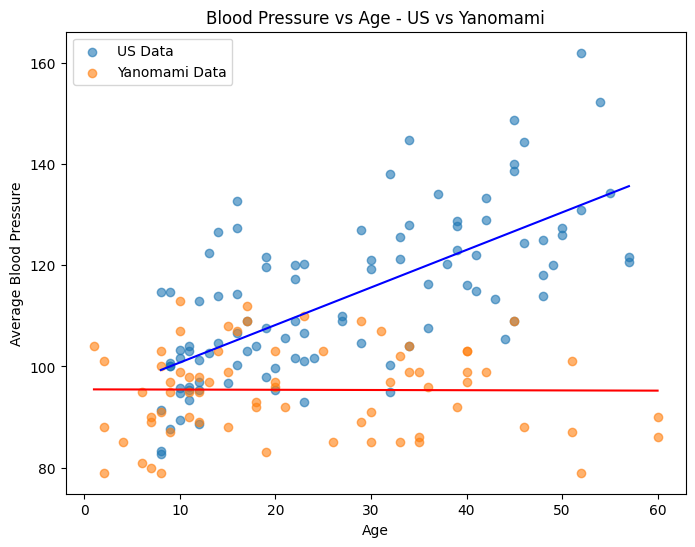

In [17]:
plt.figure(figsize=(8, 6))


# Graficar puntos reales
plt.scatter(df['age'], df['avg_bp'], label='US Data', alpha=0.6)
plt.scatter(df_remote['age'], df_remote['bp'], label='Yanomami Data', alpha=0.6)


# Graficar líneas de regresión
blood_pressure_us_model.plot_model(df['age'].min(), df['age'].max(), color='blue')
blood_pressure_yanomami_model.plot_model(df_remote['age'].min(), df_remote['age'].max(), color='red')

plt.title("Blood Pressure vs Age - US vs Yanomami")
plt.xlabel("Age")
plt.ylabel("Average Blood Pressure")
plt.legend()
plt.show()

In [21]:
print("\n--- Comparison ---")
print(f"US model R²: {blood_pressure_us_model.rsquared:.3f}")
print(f"Yanomami model R²: {blood_pressure_yanomami_model.rsquared:.3f}")

if blood_pressure_us_model.slope > blood_pressure_yanomami_model.slope:
    print("🟦 The US model shows a stronger increase in blood pressure with age.")
else:
    print("🟥 The Yanomami model shows a stronger increase in blood pressure with age.")


"""
Respuesta final:

No, los datos por sí solos no prueban causalidad.
Solo muestran una correlación entre consumo de sal y presión arterial.
Eso no significa que una cause la otra, porque puede haber otras variables confusoras que influyan en ambas.


Qué es una variable confusora

Una confounding variable (variable confusora) es una tercera variable que:

Se relaciona con la variable independiente (por ejemplo, consumo de sal).
También afecta la variable dependiente (presión arterial).

Esto puede hacer parecer que hay una relación causal cuando en realidad hay otro factor oculto.
"""



--- Comparison ---
US model R²: 0.472
Yanomami model R²: 0.000
🟦 The US model shows a stronger increase in blood pressure with age.


'\nRespuesta final:\n\nNo, los datos por sí solos no prueban causalidad.\nSolo muestran una correlación entre consumo de sal y presión arterial.\nEso no significa que una cause la otra, porque puede haber otras variables confusoras que influyan en ambas.\n\n\nQué es una variable confusora\n\nUna confounding variable (variable confusora) es una tercera variable que:\n\nSe relaciona con la variable independiente (por ejemplo, consumo de sal).\nTambién afecta la variable dependiente (presión arterial).\n\nEsto puede hacer parecer que hay una relación causal cuando en realidad hay otro factor oculto.\n'

In [20]:
from sympy import primerange
import socket
import re

primes = list(primerange(1, 10000))

# Conectarse al CTF, usando sockets como ejemplo:
host = "0.cloud.chals.io"
port = 20446

s = socket.socket()
s.connect((host, port))
print(s.recv(1024).decode())



for round_num in range(5):
    low = 0
    high = len(primes) - 1
    guesses_left = 12
    while guesses_left > 0:
        mid = (low + high) // 2
        guess = primes[mid]
        s.send(f"{guess}\n".encode())
        response = s.recv(1024).decode()
        print(guess)
        print(response)

        match = re.search(r'(Equifax\{.*?\}|flag\{.*?\})', response)
        if match:
            flag = match.group(0)
            print(f"¡Flag encontrada! {flag}")
        
        if "Correct" in response:
            print("Found the prime!")
            break
        elif "Higher!" in response:
            low = mid + 1
        else:
            high = mid - 1
        guesses_left -= 1

Welcome to Prime Number Binary Search!
You must complete 5 rounds to prove you're not just lucky!

Round 1/5
I'm thinking of a prime between 1-10,000. You have 12 guesses!
Guesses left: 12. Enter your guess: 
4523
Higher!
Guesses left: 11. Enter your guess: 
7213
Higher!
Guesses left: 10. Enter your guess: 
8641
Higher!
Guesses left: 9. Enter your guess: 
9319
Lower!
Guesses left: 8. Enter your guess: 
8963
Lower!
Guesses left: 7. Enter your guess: 
8783
Correct! The prime was 8783.
Round 1/5 complete! Next round...

Round 2/5
I'm thinking of a prime between 1-10,000. You have 12 guesses!
Guesses left: 12. Enter your guess: 
Found the prime!
4523
Lower!
Guesses left: 11. Enter your guess: 
2027
Higher!
Guesses left: 10. Enter your guess: 
3259
Lower!
Guesses left: 9. Enter your guess: 
2657
Lower!
Guesses left: 8. Enter your guess: 
2333
Higher!
Guesses left: 7. Enter your guess: 
2459
Lower!
Guesses left: 6. Enter your guess: 
2383
Higher!
Guesses left: 5. Enter your guess: 
2417
Lowe